In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
staff   = pd.read_csv('all_staff_inst.csv',index_col=0)
stud    = pd.read_csv('all_student_inst.csv',index_col=0)
enroll  = pd.read_csv('enroll.csv', index_col=0)
taul    = pd.read_csv('taulbee_vs_cs_stats.csv', index_col=0)
staff['Grand total']      =staff['Grand total'].str.replace(',','')
staff['Grand total women']=staff['Grand total women'].str.replace(',','')
staff['OBEREG']           =staff['OBEREG'].astype(float)
staff['Grand total']      =staff['Grand total'].astype(float)
staff['Grand total women']=staff['Grand total women'].astype(float)

# # staff_size  = staff[staff["INSTSIZE"] == 2]  
# staff_reg   = staff[staff["OBEREG"]==8]
# # stud_size   = stud[stud["INSTSIZE"] == 2]  
# stud_reg   = stud[stud["OBEREG"]==8]







staff_set                      = staff.groupby('Year')[[ 'Grand total','Black total','Hispanic total','Grand total women' ]].sum()
staff_set['Black total']       = staff_set['Black total']/staff_set['Grand total']
staff_set['Hispanic total']    = staff_set['Hispanic total']/staff_set['Grand total']
staff_set['Grand total women'] = staff_set['Grand total women']/staff_set['Grand total']
staff_set = staff_set.rename(columns={"Black total":"black_staff_stat"})
staff_set = staff_set.rename(columns={"Hispanic total":"hispanic_staff_stat"})
staff_set = staff_set.rename(columns={"Grand total women":"women_staff_stat"})
staff = staff_set[['black_staff_stat', 'hispanic_staff_stat', 'women_staff_stat']]

stud_set = stud.groupby('Year')[[ 'grand_total','black_total','hispanic_total','women_total', 'total_cs','black_cs','hispanic_cs','women_cs', ]].sum()
stud_set['black_cs']           = stud_set['black_cs']/(stud_set['total_cs'])
stud_set['hispanic_cs']        = stud_set['hispanic_cs']/stud_set['total_cs']
stud_set['women_cs']           = stud_set['women_cs']/stud_set['total_cs']
stud_set['black_noncs']        = (stud_set['black_total']-stud_set['black_cs'])/stud_set['grand_total']
stud_set['hispanic_noncs']     = (stud_set['hispanic_total']-stud_set['hispanic_cs'])/stud_set['grand_total']
stud_set['women_noncs']        = (stud_set['women_total']-stud_set['women_cs'])/stud_set['grand_total']
stud = stud_set[['total_cs','black_cs','hispanic_cs','women_cs']]
all_s= pd.merge(staff, stud, left_index=True, right_index=True)
all_s= pd.merge(all_s, taul, on='Year')
all_s


,Year,black_staff_stat,hispanic_staff_stat,women_staff_stat,total_cs_x,black_cs_x,hispanic_cs_x,women_cs_x,black_pct,hispanic_pct,...,black_total,hispanic_total,women_total,total_cs_y,black_cs_y,hispanic_cs_y,women_cs_y,black_noncs,hispanic_noncs,women_noncs
0,2002,0.054226,0.041014,0.602868,42.312709,0.098190,0.054440,0.266767,0.010,0.017,...,82.758256,70.301189,621.264201,46.552805,0.076247,0.043919,0.242884,0.074698,0.063473,0.561053
1,2003,0.051284,0.042500,0.606459,38.621053,0.094326,0.050014,0.272395,0.009,0.017,...,77.742063,66.150794,596.026455,42.222603,0.078230,0.043475,0.251156,0.073213,0.062319,0.561633
2,2004,0.056135,0.045632,0.595791,37.577328,0.104206,0.059322,0.219079,0.011,0.020,...,88.884058,77.167325,654.148880,40.014778,0.083467,0.050638,0.199105,0.076144,0.066126,0.560746
3,2005,0.050649,0.043533,0.594816,41.262469,0.102568,0.054653,0.246057,0.011,0.017,...,86.492754,72.992095,640.524374,44.714984,0.082353,0.045347,0.230086,0.075877,0.064055,0.562244
4,2006,0.052173,0.044651,0.582218,31.758013,0.104809,0.064061,0.200510,0.013,0.017,...,90.715040,80.786280,668.014512,32.927869,0.082744,0.054914,0.180175,0.076369,0.068026,0.562731
5,2007,0.054552,0.045189,0.585336,27.558327,0.103343,0.064662,0.179945,0.012,0.018,...,92.659181,85.295905,679.143989,28.227723,0.080849,0.055770,0.165497,0.076395,0.070340,0.560289
6,2015,0.064136,0.060085,0.490864,28.635709,0.095873,0.074876,0.170329,0.020,0.022,...,104.620053,109.007916,741.579156,30.001672,0.071122,0.065214,0.158464,0.078376,0.081669,0.555810
7,2016,0.061937,0.055132,0.482130,31.252791,0.093210,0.083157,0.173229,0.022,0.022,...,111.143799,121.035620,768.915567,33.087838,0.069737,0.073565,0.168522,0.080393,0.087549,0.556400
8,2017,0.063268,0.057388,0.486878,34.748830,0.098433,0.087524,0.173970,0.019,0.024,...,113.093668,131.712401,778.473615,36.591141,0.072303,0.075423,0.173192,0.080717,0.094012,0.555842
9,2018,0.060934,0.053265,0.477678,82.153735,0.081834,0.117080,0.230744,0.018,0.026,...,122.439252,223.502003,883.309746,106.468333,0.058499,0.099998,0.249980,0.078304,0.142941,0.565017


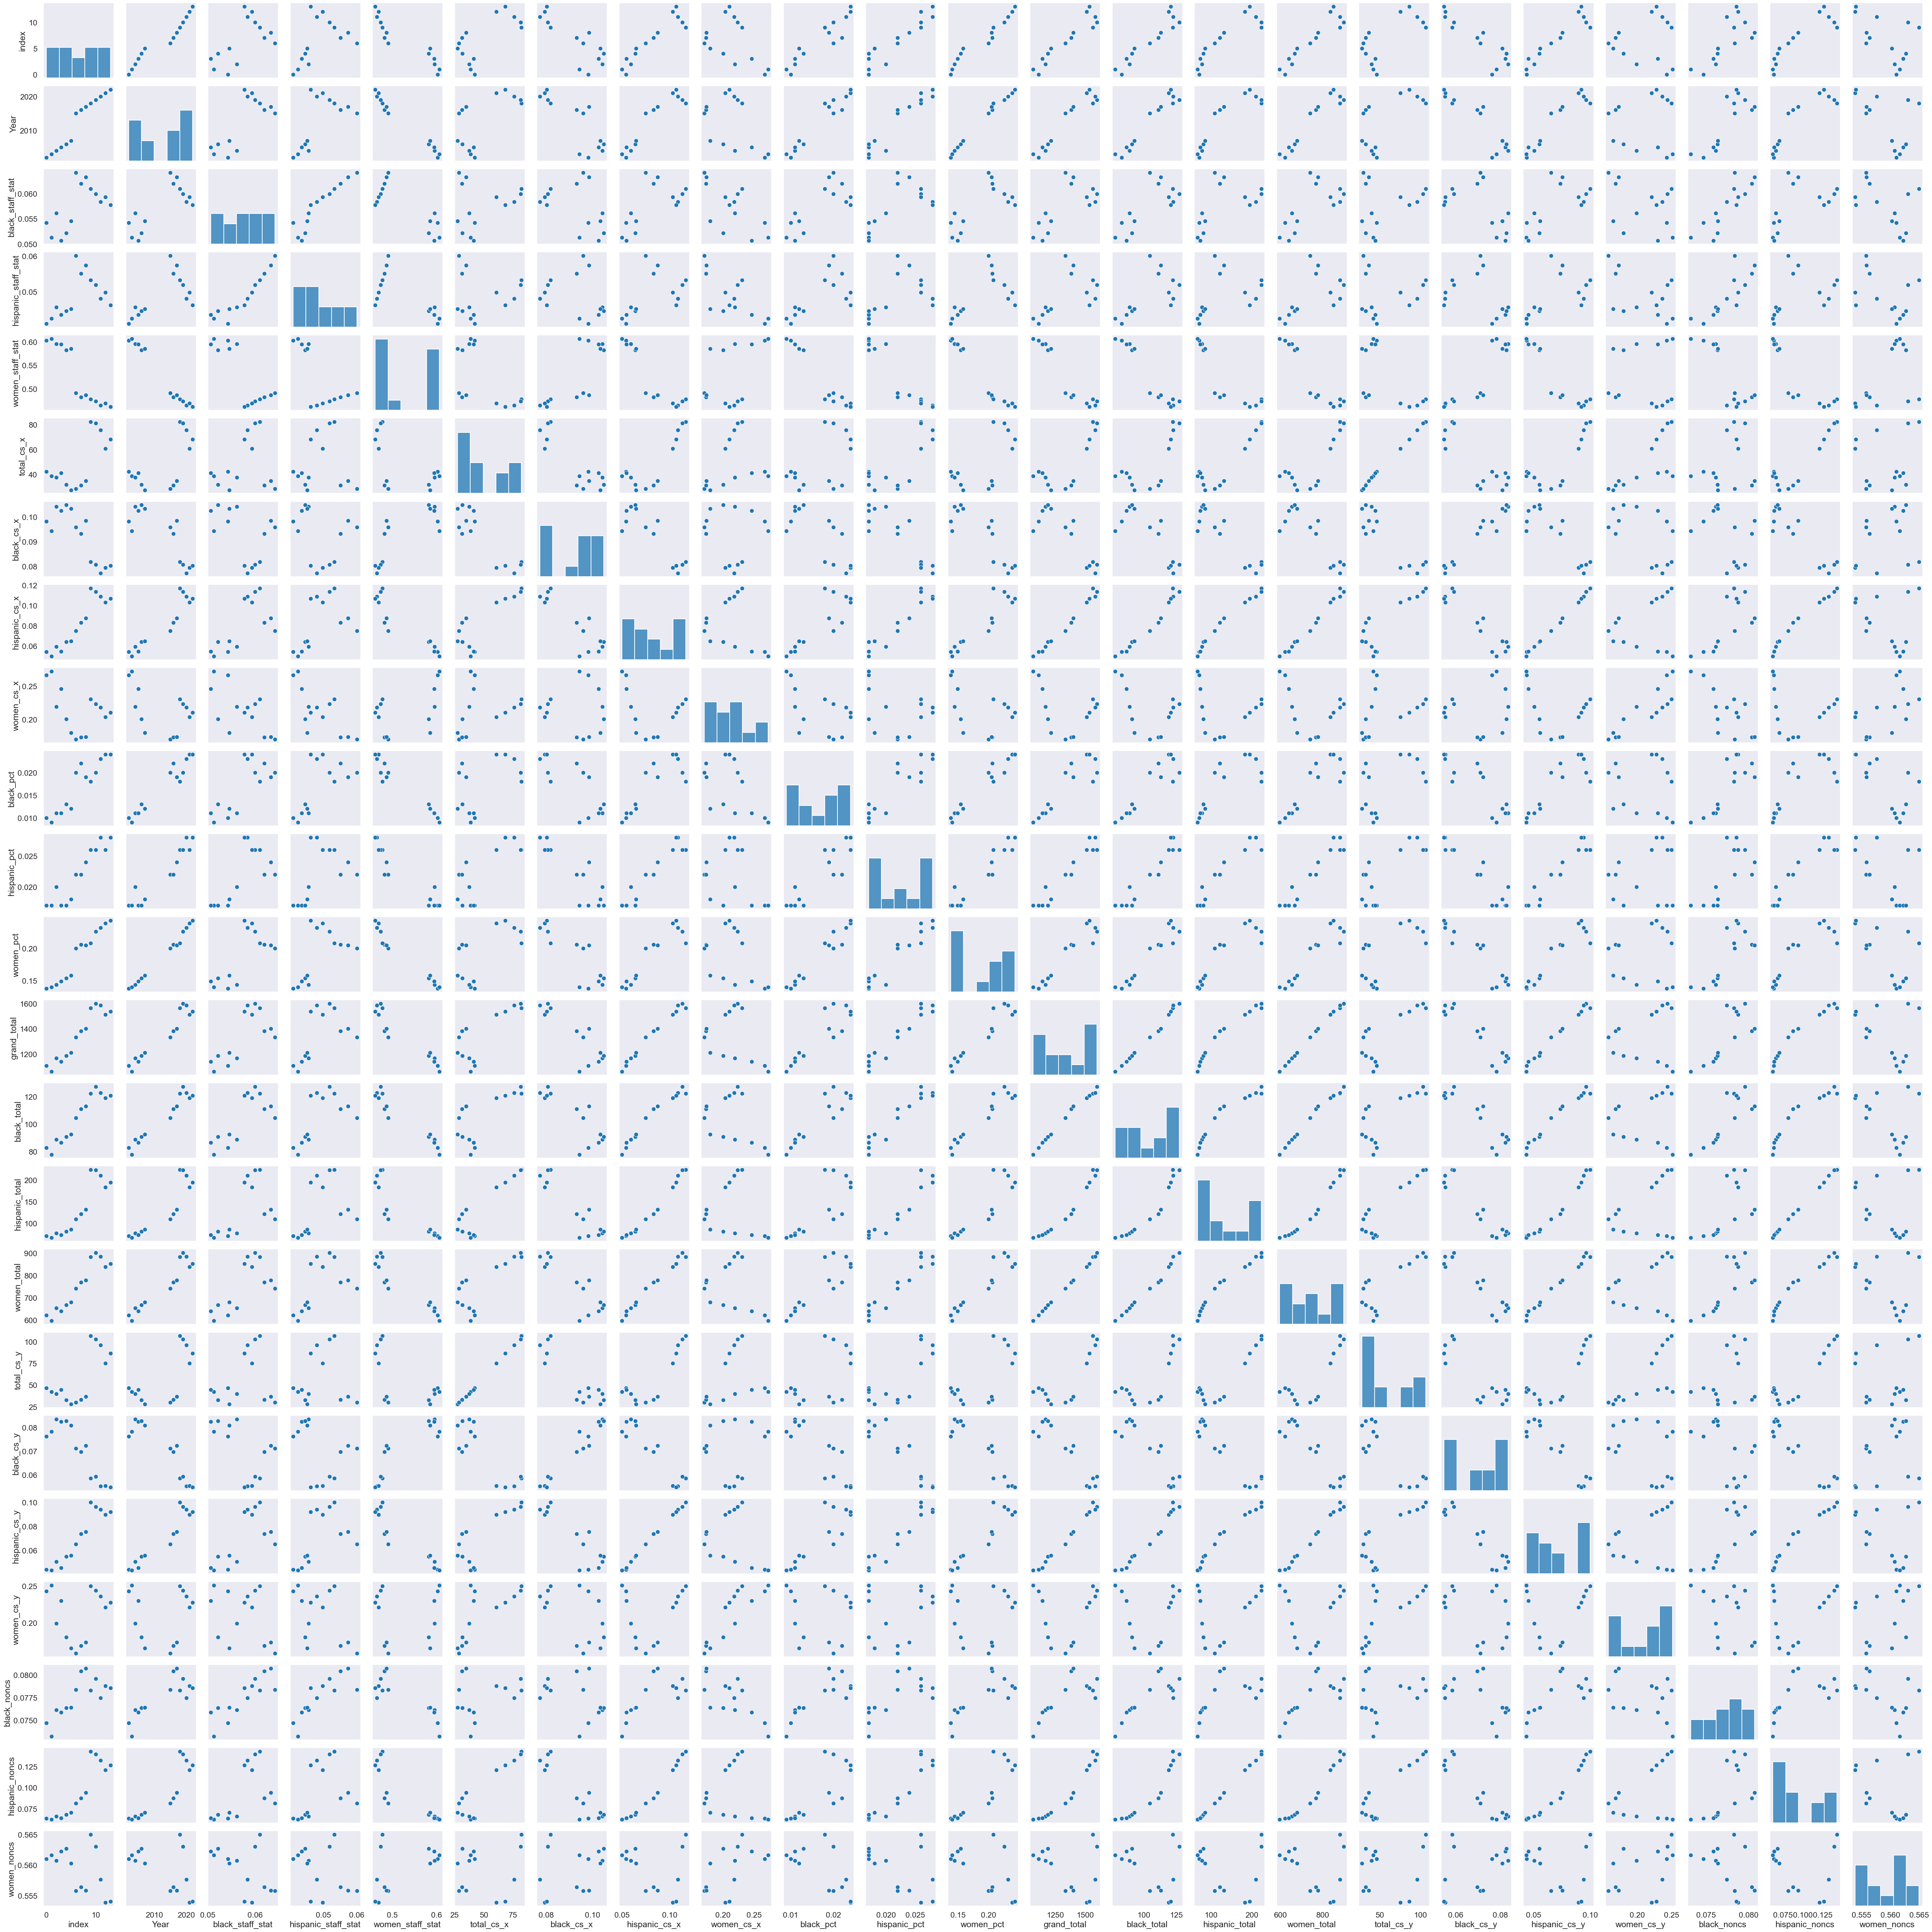

In [28]:
all_s = all_s.reset_index()
sns.set_style('dark')
sns.set_context('talk')
sns.pairplot(all_s)

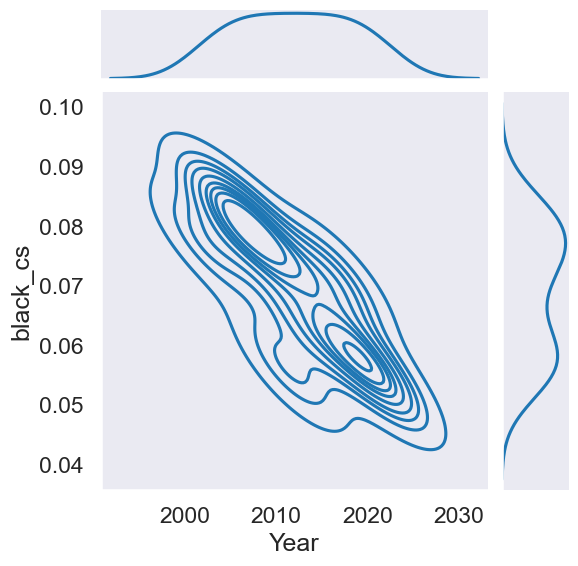

In [ ]:
sns.jointplot(x='Year', y ='black_cs', data=taul, kind = 'kde')